# SPECFEM Users Workshop -- Day 1 (Oct. 5, 2022)

## Part 1C: Intro to SPECFEM3D

SPECFEM3D follows very similar practices as SPECFEM2D, so what we have learned thus far will help us understand how to run simulations in SPECFEM3D.
In this notebook we will be using SPECFEM3D_Cartesian, which has been installed and compiled in our container. In this short introduction to SPECFEM3D, we will explore the SPECFEM3D repository, and then run small example problems with 3D models, starting with a homogeneous halfspace example. For simplicity we will restrict the 3D models to essentially 1D models in the workshop. Any subsequent use of the term 'SPECFEM3D' will refer to 'SPECFEM3D_cartesian'.

-----------

### Relevant Information

>__NOTE:__ These instructions should be run from inside the Docker container, using Jupyter Lab. The Docker container should have the adjTomo toolkit installed (SeisFlows, Pyatoa, PySEP), as well as SPECFEM2D and SPECEFM3D compiled with MPI. 

**Relevant Links:** 
- [Today's Notebook](https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_1c_intro_specfem3d.ipynb)

**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.
- To time a task, put a `%time` before the command (e.g., `%time ! ls`)


## Package exploration

The best reference on how to set up and use SPECFEM3D would be the SPECFEM3D [manual](https://github.com/geodynamics/specfem3d/blob/devel/doc/USER_MANUAL/manual_SPECFEM3D_Cartesian.pdf) . We already have the setup done in the container. Here, we will just be learning some basics on how to use SPECFEM3D, by running some simple examples.

The best way to get started is to look at the cloned SPECFEM3D [repository](https://github.com/geodynamics/specfem3d/tree/devel) structure.



In [1]:
# Go to the SPECFEM3D directory
%cd /home/scoped/specfem3d

/home/scoped/specfem3d


In [2]:
# Exploring the SPECFEM directory
! ls -v

AUTHORS
DATA
EXAMPLES
EXTERNAL_PACKAGES_coupled_with_SPECFEM3D
LICENSE
MESH-default
Makefile
Makefile.in
OUTPUT_FILES
README.md
README_do_not_modify_configure_directly_here_is_what_to_do_instead.txt
bin
config.guess
config.log
config.status
config.sub
configure
configure.ac
flags.guess
install-sh
lib
m4
run_this_example.sh
script_to_copy_all_the_initial_input_files_correctly_for_the_NUMBER_OF_SIMULTANEOUS_RUNS_option.bash
setup
src
tests
utils


The notable sub-folders here are -
- bin
- DATA
- OUTPUT_FILES
- EXAMPLES
- src

Let's look at these folders one by one

bin - the bin folder contains binary executable files which are essentially linked compiled fortran code 

In [3]:
! ls bin

xadd_model_iso
xcheck_mesh_quality
xclip_sem
xcombine_sem
xcombine_surf_data
xcombine_vol_data
xcombine_vol_data_vtk
xcombine_vol_data_vtk_bin
xcombine_vol_data_vtu
xconvert_skewness_to_angle
xconvolve_source_timefunction
xcreate_movie_shakemap_AVS_DX_GMT
xdecompose_mesh
xdecompose_mesh_mpi
xdetect_duplicates_stations_file
xgenerate_databases
xinverse_problem_for_model
xmeshfem3D
xmodel_update
xproject_and_combine_vol_data_on_regular_grid
xsmooth_sem
xspecfem3D
xsum_kernels
xsum_preconditioned_kernels


The important executables for a basic simulation are -
- xmeshfem3D
- xgenerate_databases
- xspecfem3D

DATA - The DATA folder is the input files folder and contains files which describe the -
- mesh and model - (meshfem3D_files, tomo_files)
- source - (CMTSOLUTION, FORCESOLUTION)
- station - (STATIONS)



In [4]:
! ls DATA

CMTSOLUTION    observation_grid_to_use_for_gravity.txt	STATIONS
FORCESOLUTION  Par_file					STATIONS_ADJOINT


OUTPUT_FILES - As the name suggests, this folder contains the output files of any SPECFEM3D job. The DATABASES_MPI folder in the OUTPUT_FILES folder contains the database files generated as a result of a meshing or database generation job. The database files are large in size and should only be written out when needed.

In [5]:
! ls OUTPUT_FILES

DATABASES_MPI  output_solver.txt


EXAMPLES - The EXAMPLES folder contains a variety of examples to provide a quick start, to various ways of running SPECFEM3D simulations, to the user. The recommended example to start with is the homogeneous_halfspace example (\EXAMPLES\homogeneous_halfspace). The README files within the folders within \EXAMPLES guide the user through the steps for each example. Following is a list of some commonly used examples -

- homogeneous halfspace -
    - internal mesher
    - sensitivity kernel
    - external source time function
    - external source time function
- socal1D (meshfem3D_examples/socal1D)
- sensitivity_kernels_liutromp2006

README files with steps to run these examples should not undermine the detailing provided in the manual https://github.com/geodynamics/specfem3d/blob/master/doc/USER_MANUAL on how to run SPECFEM3D.

In [6]:
! ls EXAMPLES

attenuation
BENCHMARK_CLAERBOUT_ADJOINT
change_paths_parfiles.sh
change_something_in_all_the_Par_files_automatically.bash
check_absolute_amplitude_of_force_source_seismograms
coffee_mug_with_fluid_inside
decompose_mesh_MPI
decompose_mesh_MPI_with_faults
Gmsh_simple_box_hex27
Gmsh_simple_lddrk
homogeneous_acoustic
homogeneous_halfspace
homogeneous_halfspace_HEX27_elastic_no_absorbing
homogeneous_halfspace_HEX8_elastic_absorbing_Stacey_5sides
homogeneous_halfspace_HEX8_elastic_no_absorbing
layered_halfspace
LTS_homogeneous_halfspace_HEX8
meshfem3D_examples
Mount_StHelens
noise_non_uniform
noise_tomography
process_DATA_Par_files_to_update_their_format_when_new_parameters_are_added.bash
process_DATA_Par_files_to_update_their_parameters_from_a_main_file.py
README
sensitivity_kernels_liutromp2006
small_adjoint_multiple_sources
small_example_coupling_axisem_specfem_matlab_gui_CURRENTLY_BROKEN_according_to_Vadim
small_example_coupling_axisem_specfem_script
small_example_coupling_FK_specfem
tom

src - The source code for SPECFEM3D. If you want to modify some of SPECFEM3D's features, you need to modify one or more of the files in the src subfolders. If you think the features you added would be useful to the broader SPECFEM3D community, please considering making a pull request to the SPECFEM3D github repository so that it can be reviewed and integrated to the package.

In [7]:
! ls src

auxiliaries	    generate_databases	       meshfem3D  tomography
check_mesh_quality  gpu			       shared
decompose_mesh	    inverse_problem_for_model  specfem3D


## Examples

**Setting Up** 

It is often desireable to run SPECFEM outside of the cloned repository, in order to keep files and outputs manageable. The trick here is that SPECFEM only requires 3 compenents for a sucessful simulation, the `bin/`, `DATA/`, and `OUTPUT_FILES/` directories. In this section we will set up a SPECFEM3D working directory that we can play around with.

>__NOTE:__ We will be doing all our work in the directory `/home/scoped/work_day_1/specfem3d_workdir`. All the following cells assume that we are in this directory, so you must evaluate the '%cd' command to ensure that cells work as expected.

In [8]:
from IPython.display import Image
import time

In [9]:
! mkdir -p /home/scoped/work/day_1/specfem3d_workdir

In [10]:
%cd /home/scoped/work/day_1/specfem3d_workdir

/home/scoped/work/day_1/specfem3d_workdir


In [11]:
# Symlink the binary files, and copy the relevant DATA/ directory
! ln -s /home/scoped/specfem3d/bin .
! mkdir -p OUTPUT_FILES/DATABASES_MPI
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/DATA .

ln: failed to create symbolic link './bin': File exists


In [12]:
! ls

bin   OUTPUT_FILES	      OUTPUT_FILES_example_B
DATA  OUTPUT_FILES_example_A  OUTPUT_FILES_example_C


In [13]:
! ls DATA

CMTSOLUTION		   observation_grid_to_use_for_gravity.txt
FORCESOLUTION		   Par_file
meshfem3D_files_example_A  STATIONS
meshfem3D_files_example_B  STATIONS_ADJOINT
meshfem3D_files_example_C  STATIONS_FILTERED


**1) Homogeneous halfspace** 

In [14]:
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/meshfem3D_files DATA/.

In [15]:
## Meshing - discretizes the simulation domain into nodes
# Explore the mesh files
! ls DATA/meshfem3D_files
# Run mesher
! mpiexec -np 4 ./bin/xmeshfem3D
# Explore the generated mesh files
! ls OUTPUT_FILES/DATABASES_MPI

interface1.txt	interfaces.txt	Mesh_Par_file
proc000000_Database	 proc000001_mesh.vtk	  proc000002_skewness.vtk
proc000000_mesh.vtk	 proc000001_skewness.vtk  proc000003_Database
proc000000_skewness.vtk  proc000002_Database	  proc000003_mesh.vtk
proc000001_Database	 proc000002_mesh.vtk	  proc000003_skewness.vtk


In [16]:
## Database Generation - assigns model values to the mesh nodes
# Run database generator
! mpiexec -np 4 ./bin/xgenerate_databases
# Explore the generated database files
! ls OUTPUT_FILES/DATABASES_MPI

proc000000_Database		   proc000002_Database
proc000000_external_mesh.bin	   proc000002_external_mesh.bin
proc000000_free_surface.vtk	   proc000002_free_surface.vtk
proc000000_ibool.bin		   proc000002_ibool.bin
proc000000_mesh.vtk		   proc000002_mesh.vtk
proc000000_MPI_points.vtk	   proc000002_MPI_points.vtk
proc000000_qkappa.bin		   proc000002_qkappa.bin
proc000000_qkappa.vtk		   proc000002_qkappa.vtk
proc000000_qmu.bin		   proc000002_qmu.bin
proc000000_qmu.vtk		   proc000002_qmu.vtk
proc000000_res_minimum_period.vtu  proc000002_res_minimum_period.vtu
proc000000_rho.bin		   proc000002_rho.bin
proc000000_skewness.vtk		   proc000002_skewness.vtk
proc000000_vp.bin		   proc000002_vp.bin
proc000000_vp.vtk		   proc000002_vp.vtk
proc000000_vs.bin		   proc000002_vs.bin
proc000000_vs.vtk		   proc000002_vs.vtk
proc000000_x.bin		   proc000002_x.bin
proc000000_y.bin		   proc000002_y.bin
proc000000_z.bin		   proc000002_z.bin
proc000001_Database		   proc000003_Database
proc000001_external_mesh.bin	 

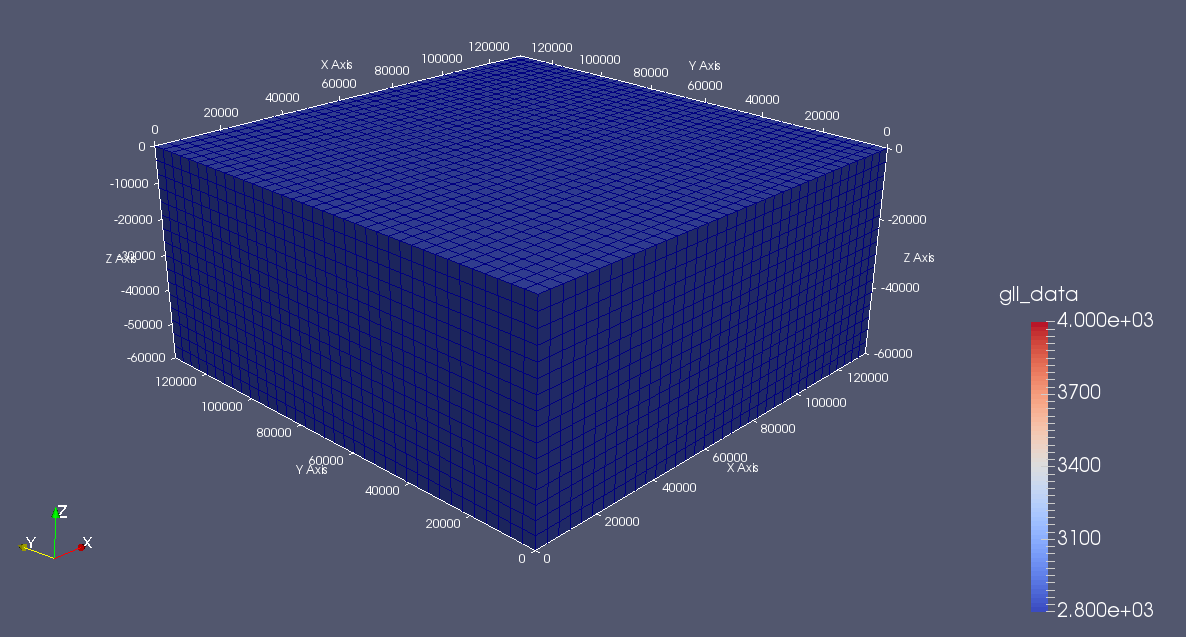

In [17]:
## View the meshing and the Vp model
# The following image was generated using Paraview
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_A.png .
Image("example_A.png")

In [18]:
## Simulation - solves for the output quantities (displacement, velocity, acceleration, etc) at the nodes
# Explore the solver files
! cat DATA/CMTSOLUTION
! cat DATA/STATIONS
! head -30 DATA/Par_file
! head -80 DATA/Par_file | tail -n 22

PDE  1999 01 01 00 00 00.00  67000 67000 -25000 4.2 4.2 homog_test
event name:       homog_test
time shift:       0.0000
half duration:    5.0
latorUTM:       67000.0
longorUTM:      67000.0
depth:          30.0
Mrr:      -7.600000e+27
Mtt:       7.700000e+27
Mpp:      -2.000000e+26
Mrt:      -2.500000e+28
Mrp:       4.000000e+26
Mtp:      -2.500000e+27
X20 DB 67000.00 22732.14 0.0 0.0
X30 DB 67000.00 34696.43 0.0 0.0
X40 DB 67000.00 46660.71 0.0 0.0
X50 DB 67000.00 58625.00 0.0 0.0
#-----------------------------------------------------------
#
# Simulation input parameters
#
#-----------------------------------------------------------

# forward or adjoint simulation
# 1 = forward, 2 = adjoint, 3 = both simultaneously
SIMULATION_TYPE                 = 1
# 0 = earthquake simulation,  1/2/3 = three steps in noise simulation
NOISE_TOMOGRAPHY                = 0
SAVE_FORWARD                    = .false.

# solve a full FWI inverse problem from a single calling program with no I/Os, storing

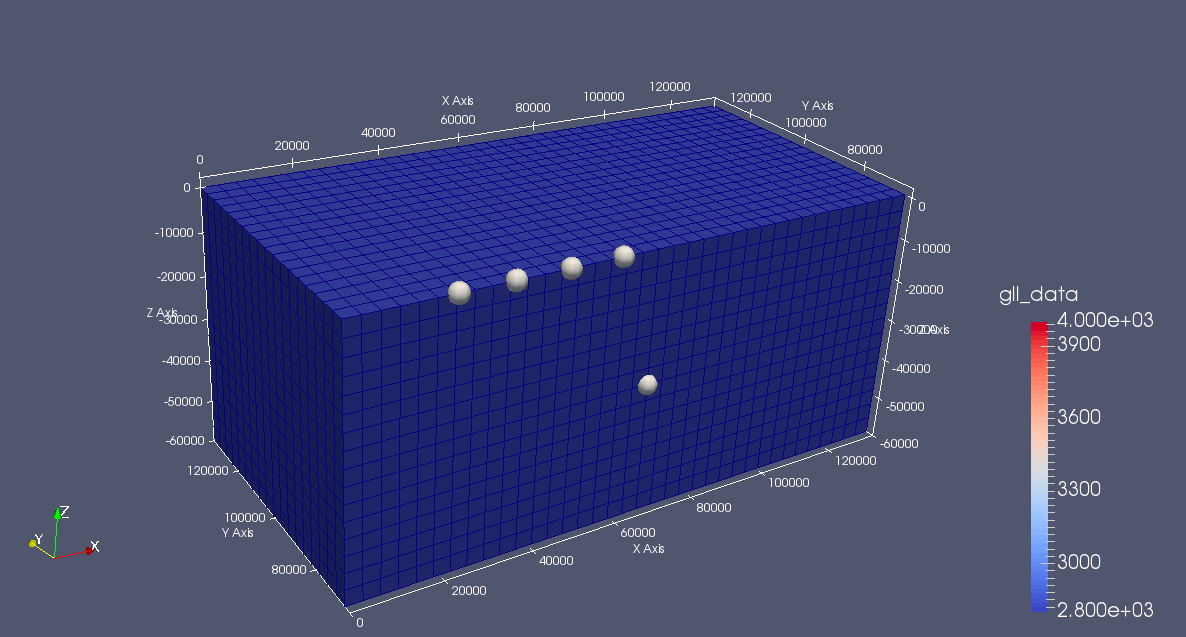

In [19]:
# View the source station geometry
# The following image was generated using Paraview
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/source_station_geometry/sr.png .
Image("sr.png")

In [20]:
# Run solver
! mpiexec -np 4 ./bin/xspecfem3D
# Tracking progress

# Explore the simulation output files
! ls OUTPUT_FILES/
! ls OUTPUT_FILES/*.semd

DATABASES_MPI	 DB.X50.BXZ.semd		  timestamp000500
DB.X20.BXX.semd  mesh_quality_histogram.txt	  timestamp001000
DB.X20.BXY.semd  output_generate_databases.txt	  timestamp001500
DB.X20.BXZ.semd  output_list_sources.txt	  timestamp002000
DB.X30.BXX.semd  output_list_stations.txt	  timestamp002500
DB.X30.BXY.semd  output_meshfem3D.txt		  timestamp003000
DB.X30.BXZ.semd  output_solver.txt		  timestamp003500
DB.X40.BXX.semd  plot_mesh_quality_histogram.gnu  timestamp004000
DB.X40.BXY.semd  sr.vtk				  timestamp004500
DB.X40.BXZ.semd  starttimeloop.txt		  timestamp005000
DB.X50.BXX.semd  surface_from_mesher.h		  values_from_mesher.h
DB.X50.BXY.semd  timestamp000005
OUTPUT_FILES/DB.X20.BXX.semd  OUTPUT_FILES/DB.X40.BXX.semd
OUTPUT_FILES/DB.X20.BXY.semd  OUTPUT_FILES/DB.X40.BXY.semd
OUTPUT_FILES/DB.X20.BXZ.semd  OUTPUT_FILES/DB.X40.BXZ.semd
OUTPUT_FILES/DB.X30.BXX.semd  OUTPUT_FILES/DB.X50.BXX.semd
OUTPUT_FILES/DB.X30.BXY.semd  OUTPUT_FILES/DB.X50.BXY.semd
OUTPUT_FILES/DB.X30.BXZ.semd  OUTPUT_

[2022-10-03 09:52:56] - pysep - INFO: starting record section plotter
[2022-10-03 09:52:56] - pysep - INFO: Reading 12 synthetics from: OUTPUT_FILES/
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXX.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXY.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXZ.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXX.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXY.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXZ.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXX.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXY.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXZ.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXX.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXY.semd
[2022-10-03 09:52:56] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXZ.semd
[2022-10-03 09:52:56] - pysep - IN

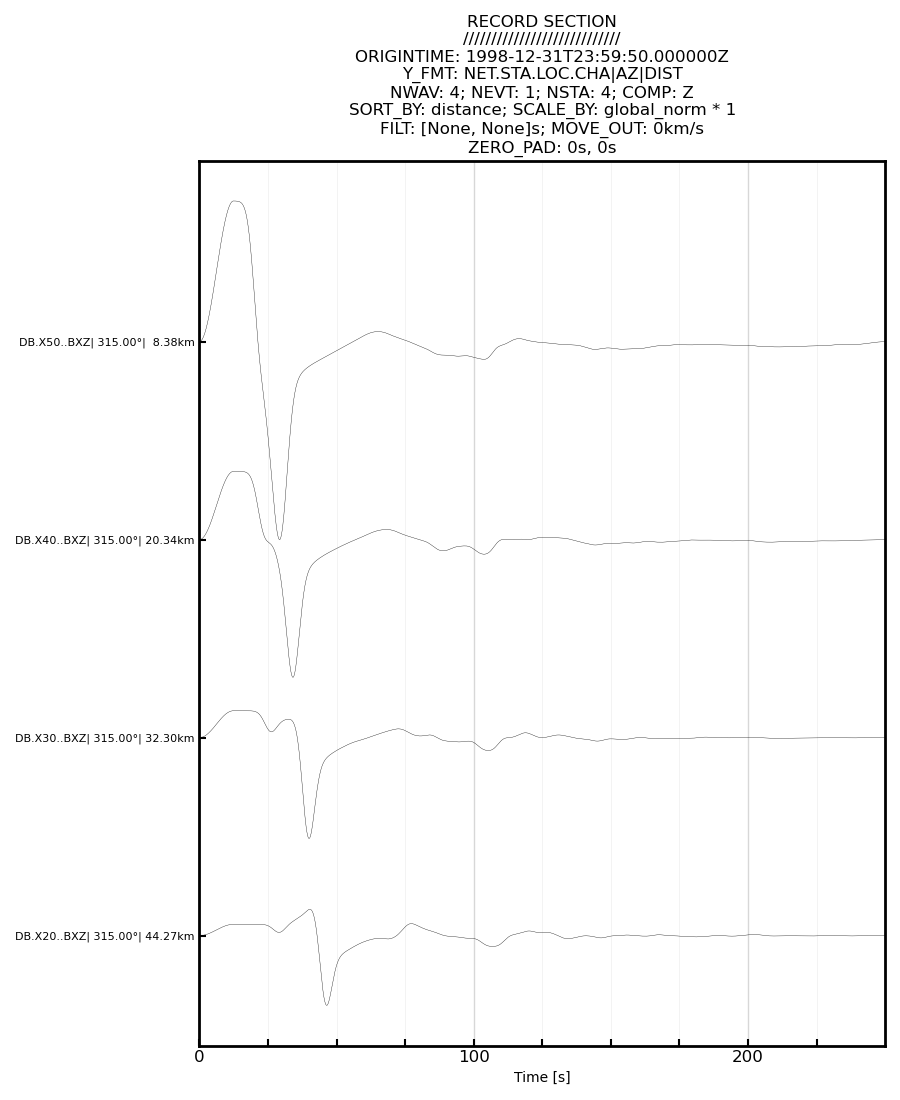

In [21]:
# Plot a record section of the output seismograms
! recsec --syn_path OUTPUT_FILES/ --cmtsolution DATA/CMTSOLUTION --stations DATA/STATIONS --cartesian --scale_by global_norm
Image("record_section.png")

In [22]:
# Archive the output files, and the mesh files
! mv sr.png OUTPUT_FILES/.
! mv example_A.png OUTPUT_FILES/mesh_examples_A.png
! mv record_section.png OUTPUT_FILES/.
! mv OUTPUT_FILES OUTPUT_FILES_example_A
! mv DATA/meshfem3D_files DATA/meshfem3D_files_example_A

**2) Two layered model**
- bottom 3/4th of homogeneous halfspace has higher velocity

In [23]:
# Setup
! cp -r /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/meshfem3D_files/example_B DATA/meshfem3D_files
! mkdir -p OUTPUT_FILES/DATABASES_MPI

In [24]:
# Check the difference
! ls DATA/meshfem3D_files
! diff /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/meshfem3D_files/example_A/Mesh_Par_file DATA/meshfem3D_files/Mesh_Par_file 

interface1.txt	interface2.txt	interfaces.txt	Mesh_Par_file
79c79
< NMATERIALS                      = 1
---
> NMATERIALS                      = 2
86c86,87
< 1   2300.0   2800.0   1500.0   2444.4    300.0 0 2
---
> 1   2800.0   4000.0   2100.0   2444.4    300.0 0 2
> 2   2300.0   2800.0   1500.0   2444.4    300.0 0 2
95c96
< NREGIONS                        = 1
---
> NREGIONS                        = 2
98c99,100
<        1             36             1              36        1        16              1
---
>        1             36             1              36        1        12              1
>        1             36             1              36       13        16              2


In [25]:
# Run Mesher
! mpiexec -np 4 ./bin/xmeshfem3D

In [26]:
# Run Database generation
! mpiexec -np 4 ./bin/xgenerate_databases

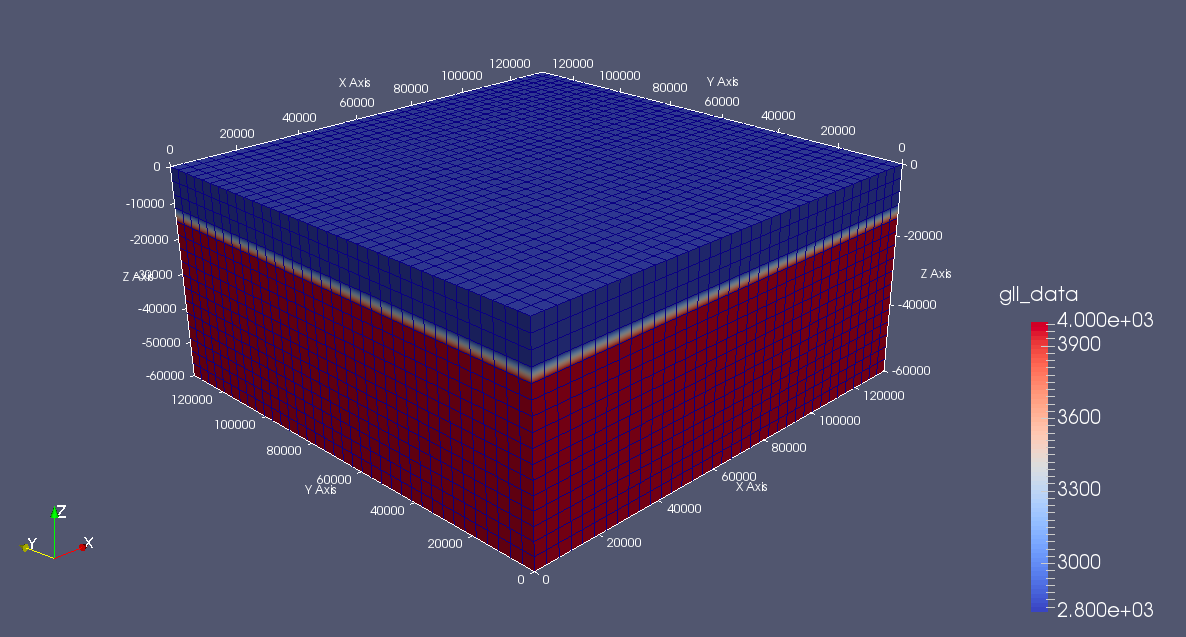

In [27]:
## View the meshing and the Vp model
# The following image was generated using Paraview
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_B.png .
Image("example_B.png")

In [28]:
# Run solver
start = time.time()
! mpiexec -np 4 ./bin/xspecfem3D
end = time.time()

# Elapsed time to run the solver
print(f'{round(end-start)}s')

249s


[2022-10-03 09:58:24] - pysep - INFO: starting record section plotter
[2022-10-03 09:58:24] - pysep - INFO: Reading 12 synthetics from: OUTPUT_FILES/
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXX.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXY.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXZ.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXX.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXY.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXZ.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXX.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXY.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXZ.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXX.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXY.semd
[2022-10-03 09:58:24] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXZ.semd
[2022-10-03 09:58:24] - pysep - IN

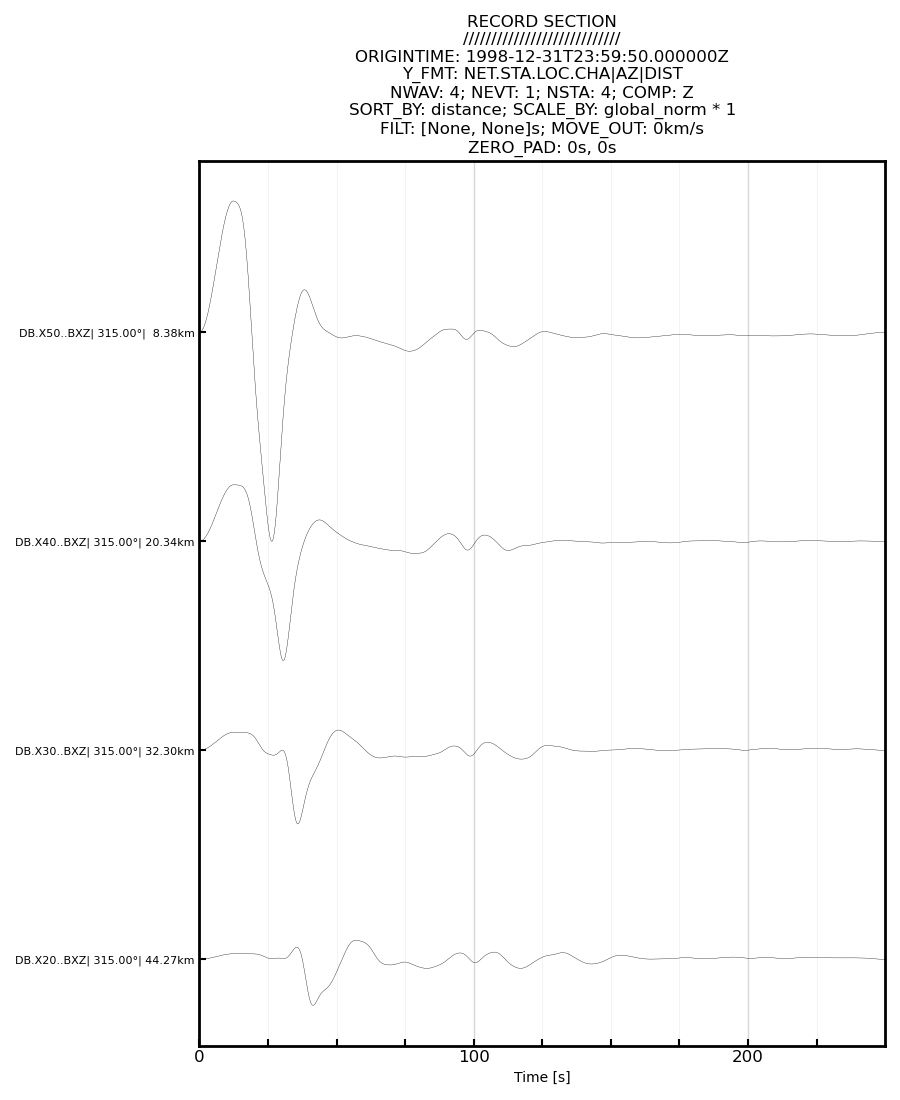

In [29]:
# Plot a record section of the output seismograms
! recsec --syn_path OUTPUT_FILES/ --cmtsolution DATA/CMTSOLUTION --stations DATA/STATIONS --cartesian --scale_by global_norm
Image("record_section.png")

In [30]:
# Archive the output files, and the mesh files
! mv example_B.png OUTPUT_FILES/mesh_examples_B.png
! mv record_section.png OUTPUT_FILES/.
! mv OUTPUT_FILES OUTPUT_FILES_example_B
! mv DATA/meshfem3D_files DATA/meshfem3D_files_example_B

**3) Two layered model with modified mesh**
- higher velocity layer has larger elements

In [31]:
# Setup
! cp -r /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/meshfem3D_files/example_C DATA/meshfem3D_files
! mkdir -p OUTPUT_FILES/DATABASES_MPI

In [32]:
# Check the difference
! ls DATA/meshfem3D_files
! diff /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/meshfem3D_files/example_B/Mesh_Par_file DATA/meshfem3D_files/Mesh_Par_file

interface1.txt	interface2.txt	interfaces.txt	Mesh_Par_file
25,26c25,26
< NEX_XI                          = 36
< NEX_ETA                         = 36
---
> NEX_XI                          = 32
> NEX_ETA                         = 32
39c39
< USE_REGULAR_MESH                = .true.
---
> USE_REGULAR_MESH                = .false.
41c41
< NDOUBLINGS                      = 0
---
> NDOUBLINGS                      = 1
44,45c44
< NZ_DOUBLING_1                   = 40
< NZ_DOUBLING_2                   = 48
---
> NZ_DOUBLING_1                   =  6
99,100c98,99
<        1             36             1              36        1        12              1
<        1             36             1              36       13        16              2
---
>        1             32             1              32        1         6              1
>        1             32             1              32        7        10              2


In [33]:
# Run Mesher
! mpiexec -np 4 ./bin/xmeshfem3D

In [34]:
# Run Database generation
! mpiexec -np 4 ./bin/xgenerate_databases

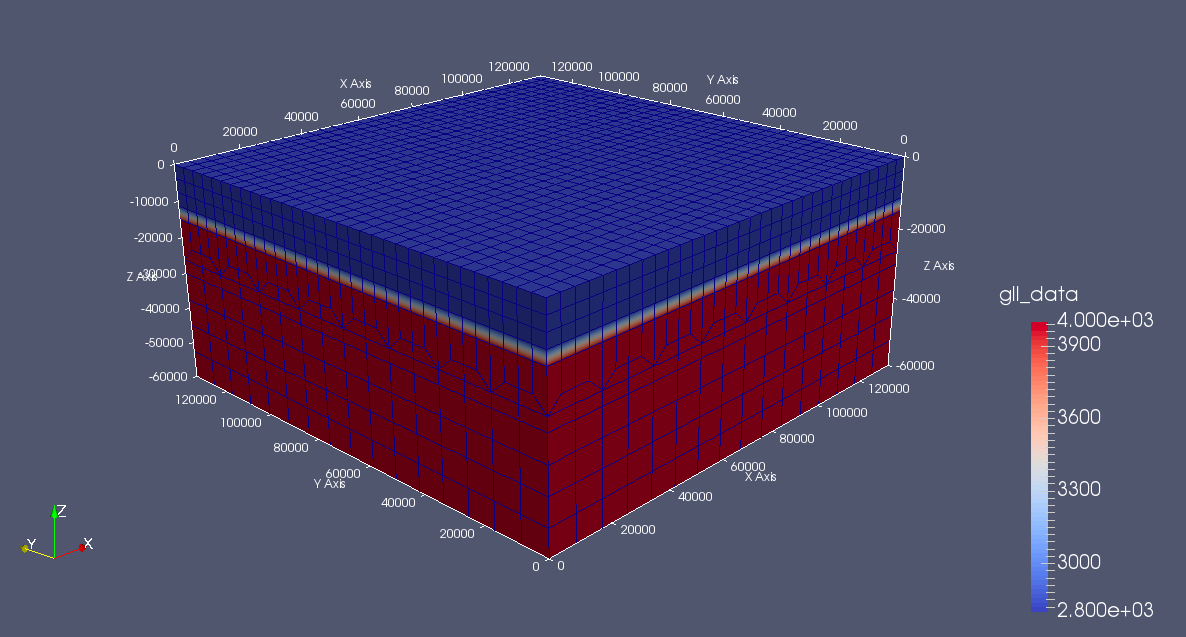

In [35]:
## View the meshing and the Vp model
# The following image was generated using Paraview
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_C.png .
Image("example_C.png")

In [36]:
# Run solver
start = time.time()
! mpiexec -np 4 ./bin/xspecfem3D
end = time.time()

# Elapsed time to run the solver
print(f'{round(end-start)}s')

87s


[2022-10-03 10:00:23] - pysep - INFO: starting record section plotter
[2022-10-03 10:00:23] - pysep - INFO: Reading 12 synthetics from: OUTPUT_FILES/
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXX.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXY.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X20.BXZ.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXX.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXY.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X30.BXZ.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXX.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXY.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X40.BXZ.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXX.semd
[2022-10-03 10:00:23] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXY.semd
[2022-10-03 10:00:24] - pysep - DEBUG: OUTPUT_FILES/DB.X50.BXZ.semd
[2022-10-03 10:00:24] - pysep - IN

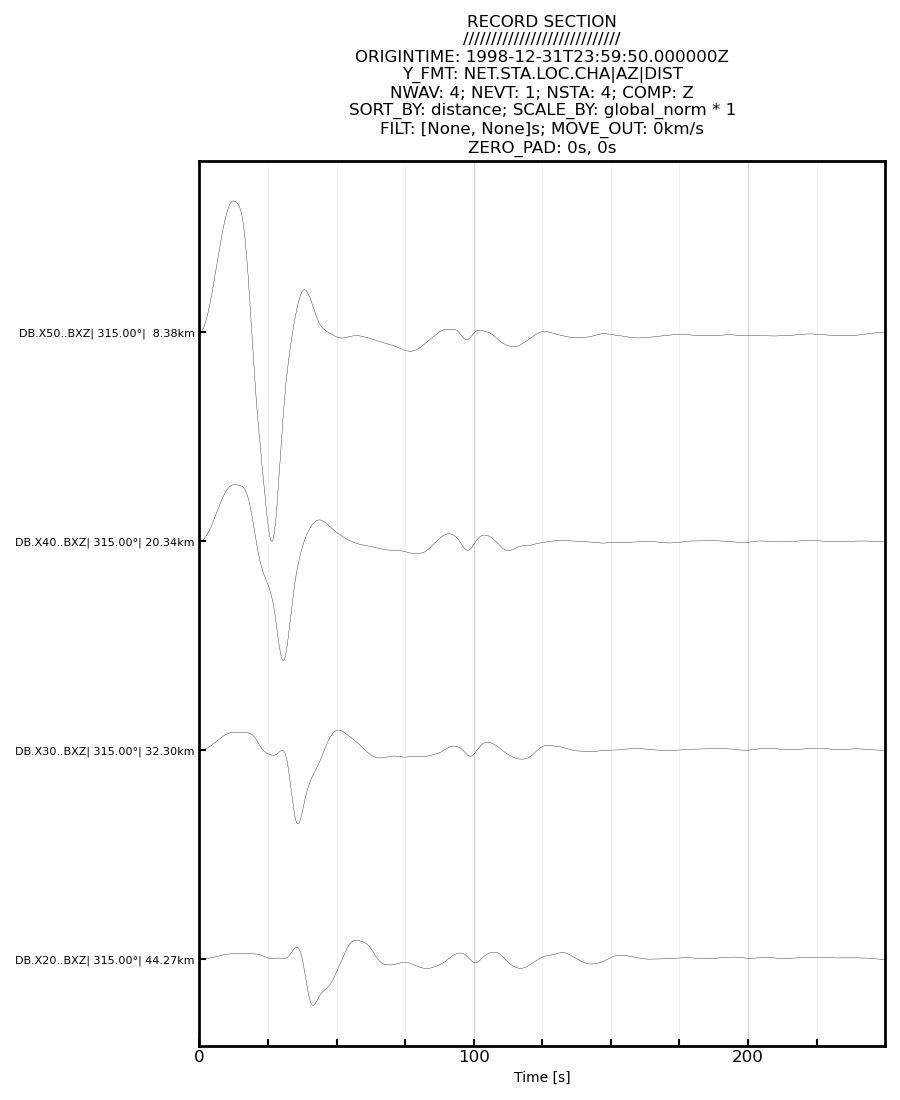

In [37]:
# Plot a record section of the output seismograms
! recsec --syn_path OUTPUT_FILES/ --cmtsolution DATA/CMTSOLUTION --stations DATA/STATIONS --cartesian --scale_by global_norm
Image("record_section.png")

In [38]:
# Archive the output files, and the mesh files
! mv example_C.png OUTPUT_FILES/mesh_examples_C.png
! mv record_section.png OUTPUT_FILES/.
! mv OUTPUT_FILES OUTPUT_FILES_example_C
! mv DATA/meshfem3D_files DATA/meshfem3D_files_example_C

The main take away here is that by increasing the element size for the higher velocity layer, we are able to speed up the simulation greatly without loosing out on the accuracy of results. A note of caution is that changing mesh dimensions with change in velocity can be challenging at times and needs a good amount of care to ensure the accuracy of results. In some cases the numerical solver runs successfully, but the results maybe completely incorrect or maybe overshadowed by artifacts.